In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)# setting allows for the 
#representation of dataframes to stretch across pages, wrapped over the full column vs row-wise
import seaborn as sbn

<h1>Reading Data to dataframe
    

In [2]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
item_cats = pd.read_csv('item_categories.csv')
train = pd.read_csv('sales_train.csv')
# set index to ID to avoid droping it later
test  = pd.read_csv('test.csv').set_index('ID')



<h2>Data Visualization

In [3]:
test.head(10)

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
5,5,5039
6,5,5041
7,5,5046
8,5,5319


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
shops.tail()

,shop_name,shop_id
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


In [6]:
item_cats.head() #categories details

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
item_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [8]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [9]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


<h2>Preprocessing

<h3>Checking for Duplacates in any dataset

In [11]:
items.duplicated(subset=["item_id"]).values.any()

False

In [12]:
shops.duplicated(subset=["shop_id"]).values.any()

False

In [13]:
item_cats.duplicated(subset=["item_category_id"]).values.any()

False

<h3>Checking for null

In [14]:
#checking for the null in train
train.isnull().values.any()


False

<h4>No null values are found

<h2>Outliers detection in item_cnt_day

<AxesSubplot:xlabel='item_cnt_day'>

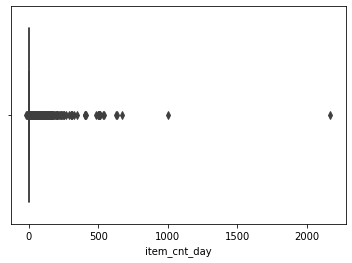

In [15]:
#Boxplot for item_cnt_day to detect the outliers in item_cnt_day
sbn.boxplot(x=train['item_cnt_day'])

<h5>It contains many negative counts in a day we had made assumption they may be as returned items not error entry but they are treated as outlier beacause predicting the sales not returns

In [16]:
print("item_cnt_day having greter than 1000 values removed from the dataset")
train[train.item_cnt_day>=1000]

item_cnt_day having greter than 1000 values removed from the dataset


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [17]:
items[items.item_id==11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


Checking how item having item_id=11373 is distributed


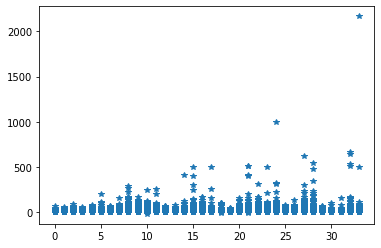

In [18]:
print("Checking how item having item_id=11373 is distributed")
item_11373=train[train.item_id==11373]
plt.plot(train['date_block_num'],train['item_cnt_day'], '*');

In [19]:
train[train.item_id==11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.00,1.0
58324,31.01.2013,0,12,11373,97.80,5.0
176790,01.02.2013,1,12,11373,229.00,1.0
176791,04.02.2013,1,12,11373,130.00,1.0
302468,29.03.2013,2,12,11373,139.50,2.0
...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0
2909830,06.10.2015,33,12,11373,208.80,5.0
2909831,05.10.2015,33,12,11373,140.75,16.0
2909832,02.10.2015,33,12,11373,648.50,2.0


In [20]:
print("Item having count 1000 per day")
items[items.item_id==20949]

Item having count 1000 per day


,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [21]:
print("Item category id is taken from items data set to detect which item having greater count")
item_cats[item_cats.item_category_id ==71]

Item category id is taken from items data set to detect which item having greater count


,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


<h4>The item is plastic carry bag which has highest sale count per day. obviously carry bag  are sold at most  with every purcahse in a day
    <br>

Boxplot for detecting count less than 0


<AxesSubplot:xlabel='item_cnt_day'>

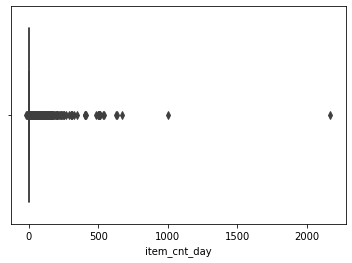

In [22]:
print("Boxplot for detecting count less than 0")
sbn.boxplot(x=train['item_cnt_day'])

In [23]:
print("Removing the item having count less than 0")
train=train[train.item_cnt_day>0]

Removing the item having count less than 0


In [24]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


Plotting to detect is there any other outliers


<AxesSubplot:xlabel='item_cnt_day'>

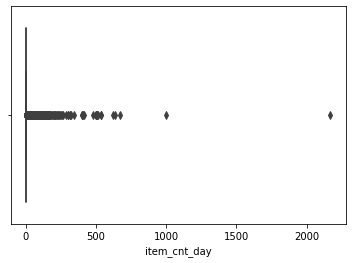

In [25]:
print("Plotting to detect is there any other outliers")
sbn.boxplot(x=train['item_cnt_day'])

<h2>Detecting the outlier in price column

In [26]:
print("Detecting the price having less than 0")
train[train.item_price<0]

Detecting the price having less than 0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


<h4>There are 7356 items with count less than 1  which are treated as outlier

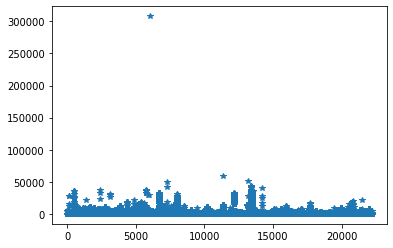

In [27]:
plt.plot(train['item_id'],train['item_price'], '*');

In [28]:
train[train.item_price > 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [29]:
items[items.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


<h4>It is software service sold to 522 persons at once

In [30]:
train[train.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


<h6>Preapring Data for Analysis

In [31]:
print("Copyting data from train to further divide the data set")
preprocess_train = train
print("Splitting date to required fromat")
preprocess_train['date'] =  pd.to_datetime(preprocess_train['date'],format= '%d.%m.%Y')
preprocess_train['month'] = pd.DatetimeIndex(preprocess_train['date']).month
preprocess_train['year'] = pd.DatetimeIndex(preprocess_train['date']).year
preprocess_train['day'] = pd.DatetimeIndex(preprocess_train['date']).day
print("Allocating columns to data")
preprocess_train = preprocess_train.iloc[:,1:9]

Copyting data from train to further divide the data set
Splitting date to required fromat
Allocating columns to data


In [32]:
preprocess_train.head(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day
0,0,59,22154,999.00,1.0,1,2013,2
1,0,25,2552,899.00,1.0,1,2013,3
3,0,25,2554,1709.05,1.0,1,2013,6
4,0,25,2555,1099.00,1.0,1,2013,15
5,0,25,2564,349.00,1.0,1,2013,10
6,0,25,2565,549.00,1.0,1,2013,2
7,0,25,2572,239.00,1.0,1,2013,4
8,0,25,2572,299.00,1.0,1,2013,11
9,0,25,2573,299.00,3.0,1,2013,3
10,0,25,2574,399.00,2.0,1,2013,3


<h4>Plot between date_block_num and item_cnt_day

Checking for the distribution of sales 


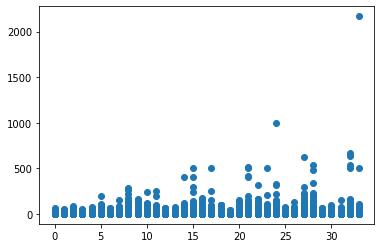

In [33]:
print("Checking for the distribution of sales ")
plt.plot(preprocess_train['date_block_num'],preprocess_train['item_cnt_day'], 'o');

In [34]:
preprocess_train[preprocess_train.item_cnt_day>2000]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day
2909818,33,12,11373,0.908714,2169.0,10,2015,28


<h4>As inspection fron the web item_name ="Доставка до пункта выдачи (Boxberry)" is delivey agent and it is the delivery with respect to the shop id 12 no other shops has delivery

<br>
<h3>Variation of sales Throught the year

Plot for item_cnt_day w.r.t year, month and day


<AxesSubplot:xlabel='month,day'>

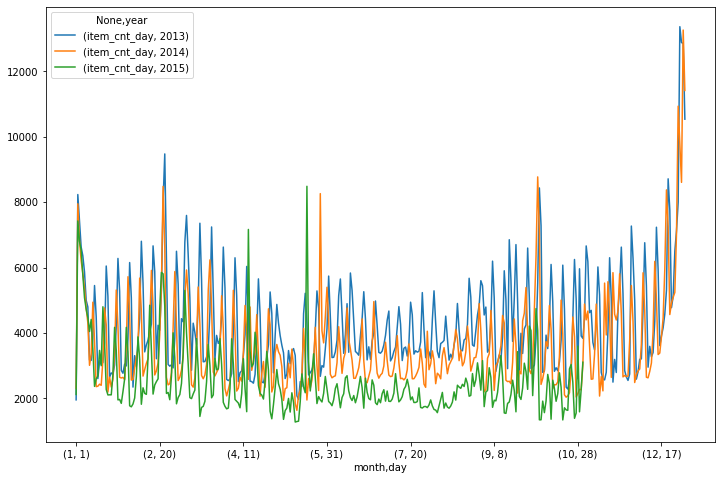

In [35]:
print("Plot for item_cnt_day w.r.t year, month and day")
data = preprocess_train.groupby(['year', 'month', 'day']).agg({'item_cnt_day': np.sum}).unstack('year')
data.plot(figsize=(12, 8))

<h5>Assumption: Festival Affecting the sales trend
<br>Festival In Russia
<br>
The festivals in the given list below mention Russia festivals 2020. Have a look.

<br>The New Year: 31st Dec 2019
<br>Orthodox Christmas: 7th Jan 2020
<br>Maslenitsa Festival: 24th Feb to 1st Mar 2020
<br>Reindeer Herder’s Festival: 28th Mar 2020
<br>Russian Orthodox Easter Week: 19th April 2020
<br>Moscow Golden Mask Festival: NA
<br>Victory Day: 9th May 2020

Individual sales data of each shop


<AxesSubplot:xlabel='shop_id'>

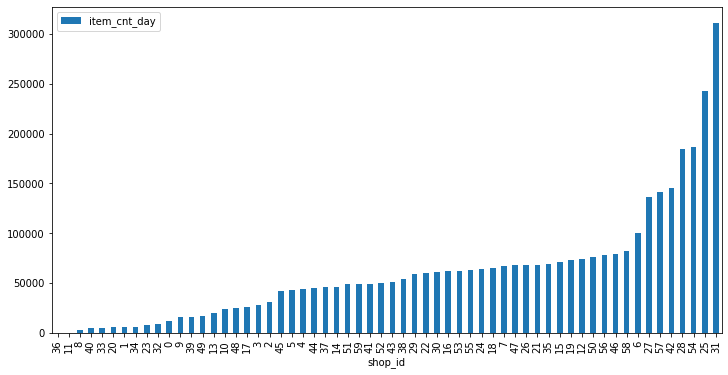

In [36]:
print("Individual sales data of each shop")
sales_data = preprocess_train.groupby('shop_id')['item_cnt_day'].sum().sort_values().reset_index()
sales_data.plot(x='shop_id', y='item_cnt_day', kind='bar', figsize=(12, 6))

In [37]:
shops[shops.shop_id ==31]

,shop_name,shop_id
31,"Москва ТЦ ""Семеновский""",31


<h5>Semenovskiy Shopping & Entertainment Center (ТРЦ Семеновский) which is digital electronic sales store indicates that digital products are having more sales

<AxesSubplot:xlabel='shop_id'>

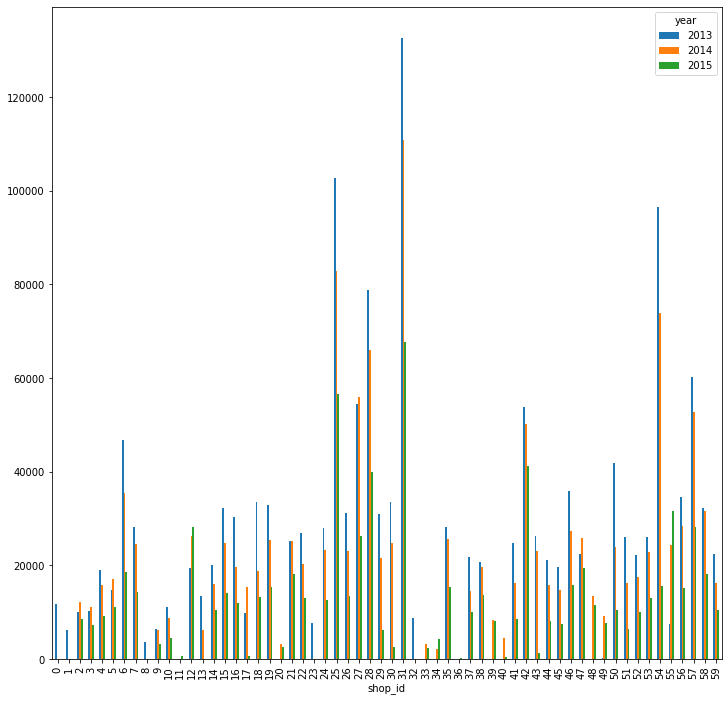

In [38]:
data = preprocess_train.groupby(['year', 'shop_id'])['item_cnt_day'].sum().sort_values().reset_index().\
    pivot(index='shop_id', columns='year', values='item_cnt_day')
data.plot(kind='bar', figsize = (12, 12))

In [39]:
print("creating whole data to monthly basis sale")

monthly_sales=preprocess_train.groupby(["date_block_num","shop_id","item_id"]).agg({"item_cnt_day":"sum"})
print("Taking 4 columns from train dataset")
monthly_sales['date_block_num'] = monthly_sales.index.get_level_values('date_block_num') 
monthly_sales['shop_id'] = monthly_sales.index.get_level_values('shop_id') 
monthly_sales['item_id'] = monthly_sales.index.get_level_values('item_id')
monthly_sales.reset_index(drop=True, inplace=True)
print("Setting index for data_block_num shop_id and item_id")
monthly_sales = monthly_sales.reindex(['date_block_num','shop_id','item_id','item_cnt_day'], axis=1)
monthly_sales.head(10)

creating whole data to monthly basis sale
Taking 4 columns from train dataset
Setting index for data_block_num shop_id and item_id


,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
5,0,0,61,1.0
6,0,0,75,1.0
7,0,0,88,1.0
8,0,0,95,1.0
9,0,0,96,1.0


<h3>Item sales count insights</h3>

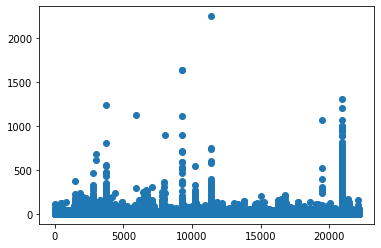

In [40]:
plt.plot(monthly_sales['item_id'],monthly_sales['item_cnt_day'],'o');

In [41]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608226 entries, 0 to 1608225
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date_block_num  1608226 non-null  int64  
 1   shop_id         1608226 non-null  int64  
 2   item_id         1608226 non-null  int64  
 3   item_cnt_day    1608226 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 49.1 MB


In [42]:
monthly_sales[monthly_sales.item_id==11373]

,date_block_num,shop_id,item_id,item_cnt_day
11269,0,12,11373,6.0
74754,1,12,11373,2.0
130535,2,12,11373,21.0
192238,3,12,11373,9.0
247200,4,12,11373,7.0
301091,5,12,11373,28.0
357325,6,12,11373,9.0
415834,7,12,11373,39.0
473021,8,12,11373,33.0
525075,9,12,11373,51.0


<h4>As of inspection from web the item (item_id=11373) which has the most sale in a delivery service offered by the shop (shop_id=12) and the price of it varies since different location has different pricing.For 1000 items since it is not applicable to large dataset.
    <br>

<h1>Using Mahalanobis distance to find outlier in the data

<h3>Outlier detectio

In [43]:
import scipy as sp
def mahalanobis(x=None, data=None, cov=None):

    x_minus_mu = x - np.mean(monthly_sales)
    if not cov:
        cov = np.cov(monthly_sales.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

sales_mahala = monthly_sales[['date_block_num', 'item_cnt_day', 'item_id','shop_id']].head(10000)
sales_mahala['m_dist'] = mahalanobis(x=sales_mahala, data=monthly_sales[['date_block_num', 'item_cnt_day', 'item_id','shop_id']])
sales_mahala.head()

,date_block_num,item_cnt_day,item_id,shop_id,m_dist
0,0,6.0,32,0,19.893389
1,0,3.0,33,0,19.815335
2,0,1.0,35,0,19.799159
3,0,1.0,43,0,19.794651
4,0,2.0,51,0,19.794000


<AxesSubplot:xlabel='m_dist'>

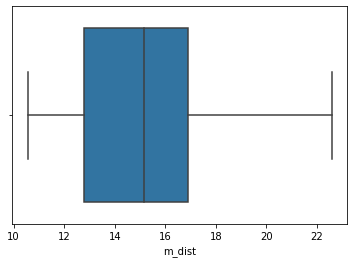

In [44]:
sbn.boxplot(x=sales_mahala['m_dist'])

<h4>Mahalnobis distance is distributed there are no outliers

In [45]:
sales_mahala[sales_mahala.m_dist>20]

,date_block_num,item_cnt_day,item_id,shop_id,m_dist
10,0,25.0,98,0,21.876590
135,0,21.0,1871,0,20.301566
367,0,37.0,4163,0,22.590544
368,0,29.0,4164,0,20.730044
450,0,27.0,4907,0,20.082027
1285,0,35.0,12134,0,20.783208
1437,0,38.0,13354,0,21.633936
1580,0,39.0,14433,0,22.043226
1638,0,31.0,14826,0,20.173245
1765,0,33.0,16450,0,20.975853


In [46]:
sales_mahala[(sales_mahala.m_dist<=18) & (sales_mahala.m_dist>17) ]

,date_block_num,item_cnt_day,item_id,shop_id,m_dist
347,0,1.0,3941,0,17.989523
348,0,2.0,3947,0,17.989324
349,0,1.0,3958,0,17.983361
350,0,1.0,3961,0,17.982276
351,0,1.0,3965,0,17.980829
...,...,...,...,...,...
5189,0,2.0,22014,3,17.330583
5190,0,1.0,22069,3,17.368633
5191,0,2.0,22151,3,17.408781
5880,0,33.0,13350,4,17.116721


<h2>The item_sales_cnt per day having greater than 40 are away from the mahalnobis distance indicates that item having count greater than 40 are outliers

In [47]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608226 entries, 0 to 1608225
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date_block_num  1608226 non-null  int64  
 1   shop_id         1608226 non-null  int64  
 2   item_id         1608226 non-null  int64  
 3   item_cnt_day    1608226 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 49.1 MB


<br><h2>Training Model</h2>

In [48]:
monthly_sales.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [49]:
monthly_sales.describe()

,date_block_num,shop_id,item_id,item_cnt_day
count,1.608226e+06,1.608226e+06,1.608226e+06,1.608226e+06
mean,1.466502e+01,3.280798e+01,1.068148e+04,2.273155e+00
std,9.542384e+00,1.653645e+01,6.238856e+03,8.653236e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.000000e+00,2.100000e+01,5.046000e+03,1.000000e+00
50%,1.400000e+01,3.100000e+01,1.049700e+04,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.606000e+04,2.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,2.253000e+03


<h4>Though the monthly sales of item count is not outlier to get well trined data we remove them and the item count having less than 0 we set them to 0

In [50]:
monthly_sales = monthly_sales[(monthly_sales.item_cnt_day <3 )]
monthly_sales.loc[monthly_sales.item_cnt_day < 1, "item_cnt_day"] = 0
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326225 entries, 2 to 1608225
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date_block_num  1326225 non-null  int64  
 1   shop_id         1326225 non-null  int64  
 2   item_id         1326225 non-null  int64  
 3   item_cnt_day    1326225 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 50.6 MB


In [51]:
print("Imprting sklearn tree model")
from sklearn import tree

from sklearn.model_selection import train_test_split
print("Importing DecissionTreeClassifier from sklearn tree")
DTC = tree.DecisionTreeClassifier(criterion='gini') 

print("Taking shpo_id, date_block_num and item_id for training models")
cols = ['shop_id','date_block_num','item_id']
print("Importing cols to X")
X = monthly_sales[cols] 
print("importing predicting set to y which is item_cnt_day")
y = monthly_sales.item_cnt_day 

print("Splitting the dataset by using sklearn package train_test_split in the ratio of 90% test data 10% train dataset")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Imprting sklearn tree model
Importing DecissionTreeClassifier from sklearn tree
Taking shpo_id, date_block_num and item_id for training models
Importing cols to X
importing predicting set to y which is item_cnt_day
Splitting the dataset by using sklearn package train_test_split in the ratio of 90% test data 10% train dataset
(1193602, 3) (1193602,) (132623, 3) (132623,)


<h3>Prediction using DecissionTreeClassifier

In [52]:
print("Fitting decision tree model by providing train dataset")
DTC.fit(X_train, y_train)

Fitting decision tree model by providing train dataset


DecisionTreeClassifier()

In [53]:
print("Predicting the sels using predict function")
yhat=DTC.predict(X_test)

Predicting the sels using predict function


In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy predicting using sklearn accuracy score")
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy predicting using sklearn accuracy score
Accuracy: 0.705


<h3>Prediction using DecissionTreeRegressor

In [55]:
DTR=tree.DecisionTreeRegressor(random_state=22)
print("Fitting decision tree model by providing train dataset")
DTR.fit(X_train, y_train)

Fitting decision tree model by providing train dataset


DecisionTreeRegressor(random_state=22)

In [56]:
print("Predicitng the DTR models accuracy ")
Dtryhat=DTR.predict(X_test)
acc = accuracy_score(y_test, Dtryhat)
print('Accuracy: %.3f' % acc)


Predicitng the DTR models accuracy 
Accuracy: 0.705


<h3>Final predicting for the 34th month

In [57]:
DTR.fit(X, y)

DecisionTreeRegressor(random_state=22)

In [58]:
print("Takinghte data shop_id and item_id from test")
predict_DTR = test[['shop_id','item_id']]
print("Initialising 34 date)block_num to 34")
predict_DTR.insert(loc=1, column='date_block_num', value='34')  
predict_DTR.head(10)

Takinghte data shop_id and item_id from test
Initialising 34 date)block_num to 34


,shop_id,date_block_num,item_id
ID,,,
0,5,34,5037
1,5,34,5320
2,5,34,5233
3,5,34,5232
4,5,34,5268
5,5,34,5039
6,5,34,5041
7,5,34,5046
8,5,34,5319


<h4>Predicting the datset for entire train

In [59]:
print("saving dataset in predicted_dtr")
predicted_DTR = pd.DataFrame(DTR.predict(predict_DTR))

predicted_DTR = predict_DTR.join(predicted_DTR)

saving dataset in predicted_dtr


In [60]:
print("Taking shop_id, date_block_num, item_id, item_cnt")
predicted_DTR.columns = ['shop_id', 'date_block_num','item_id', 'item_cnt']
predicted_DTR = predicted_DTR.reindex(['shop_id','date_block_num','item_id','item_cnt'], axis=1)


Taking shop_id, date_block_num, item_id, item_cnt


In [61]:
print("Saving predicted dataset to Future_sales_DTR")
predicted_DTR.to_csv("Future_Sales_DTR.csv", sep=',')
predicted =pd.read_csv('Future_Sales_DTR.csv')
predicted.head(5)

Saving predicted dataset to Future_sales_DTR


,ID,shop_id,date_block_num,item_id,item_cnt
0,0,5,34,5037,1.0
1,1,5,34,5320,2.0
2,2,5,34,5233,1.0
3,3,5,34,5232,1.0
4,4,5,34,5268,1.0


In [62]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   shop_id         214200 non-null  int64  
 2   date_block_num  214200 non-null  int64  
 3   item_id         214200 non-null  int64  
 4   item_cnt        214200 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 8.2 MB
